## Project 2 - Admissions

In [85]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [86]:
#Read in data from source 
df_raw = pd.read_csv("/Users/ianmc213/Downloads/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


|   Variable   |   Defintion                            |      Key                       |       
|    :---:     |     :---:                              |     :---:                      | 
| Admit        | Admitted                               |  0 = No, 1 = Yes               |
| gpa          | GPA                                    |                                |
| gre          | GRE                                    |                                |
| rank         | Prestige Applicants Alma Mater         |  Rank 1-4, 1 = best, 4 = worse |

## Questions

#### Question 1. How many observations are in our data set?

In [87]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a Summary table

In [88]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [89]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores are more spread out compared to GPA scores, which are more clustered around the mean. More variety in GRE scores for admitted applicants.

#### Question 4. Drop data points with missing data.

In [90]:
admissions = pd.read_csv("/Users/ianmc213/Downloads/admissions.csv")

In [91]:
admissions.dropna().isnull().apply(sum, axis = 0)

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell?

Answer: If all values are 0, then data is correct.

#### Question 6. Create Box Plots for GRE & GPA

In [92]:
import seaborn as sns

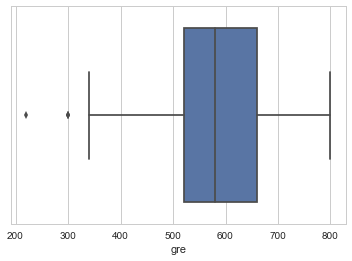

In [93]:
#boxplot 1
sns.set_style("whitegrid")
ax = sns.boxplot(x=admissions["gre"])

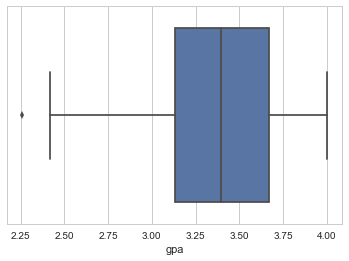

In [94]:
#boxplot 2
sns.set_style("whitegrid")
ax = sns.boxplot(x=admissions["gpa"])

#### Question 7. What do the box plots show?

Answer: The box plots show the medians of the GPA and GRE data. There also aren't many outliers with either data group, which most likely have no impact on either. GPA is symmetric.

#### Question 8. Describe each distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132993410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1214a4290>]], dtype=object)

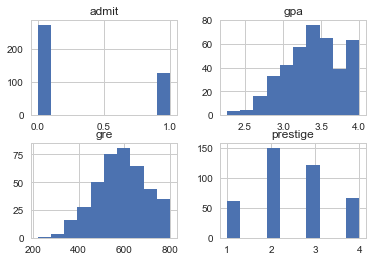

In [95]:
# plot the distribution of each variable
admissions.hist()

In [96]:
admissions.mean()

admit         0.317500
gre         588.040201
gpa           3.390930
prestige      2.486216
dtype: float64

In [97]:
admissions.median()

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

In [98]:
admissions.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [99]:
admissions.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [100]:
admissions.cov()

,admit,gre,gpa,prestige
admit,0.217237,9.871271,0.031191,-0.106189
gre,9.871271,13369.953040,16.824761,-13.648068
gpa,0.031191,16.824761,0.144879,-0.021260
prestige,-0.106189,-13.648068,-0.021260,0.893654


#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

In [126]:
#Shapiro Wilks Test
import scipy.stats as stats

In [131]:
#Anderson Darling Test
stats.anderson(x, dist='norm')

AndersonResult(statistic=84.551422733279082, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Since the A2 test statistic (84.5) is larger than the critical values, the null hypothesis can be rejected in a normal distribution.

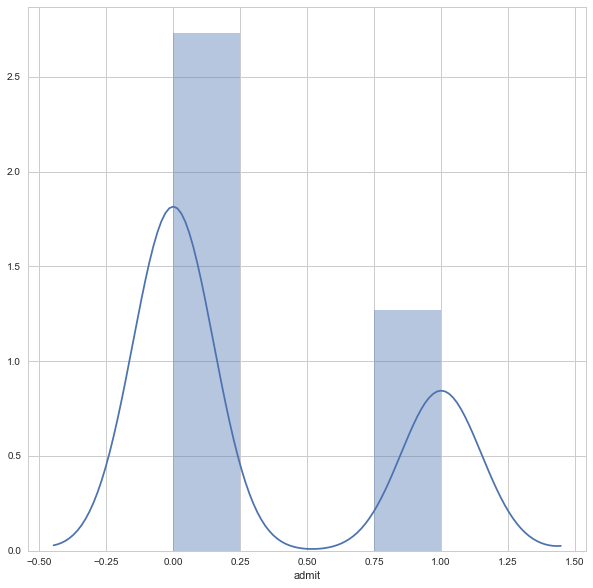

In [132]:
sns.distplot(x);

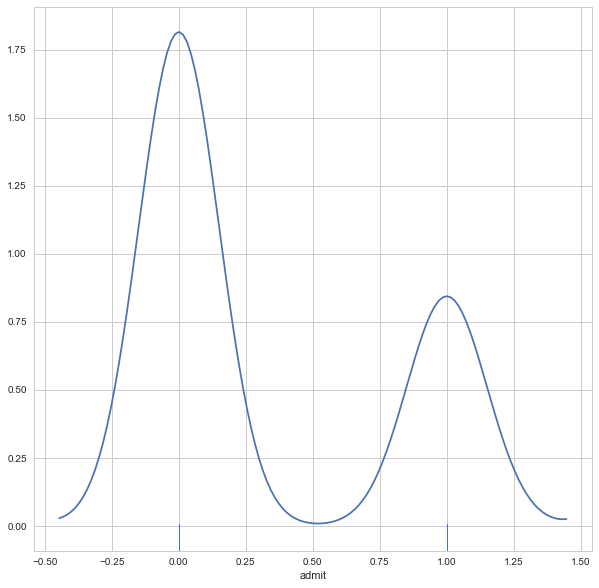

In [133]:
sns.distplot(x, hist=False, rug=True);

#### Question 10. Does this distribution need correction? If so, why? How?

Answer: No, this shows a normal distribution of the data.

#### Question 11. Which of our variables are potentially colinear?

In [101]:
#create a correlation matrix for the data
admissions.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


GPA and GRE are the variables that are most 'potentially' colinear with a correlation of 0.38

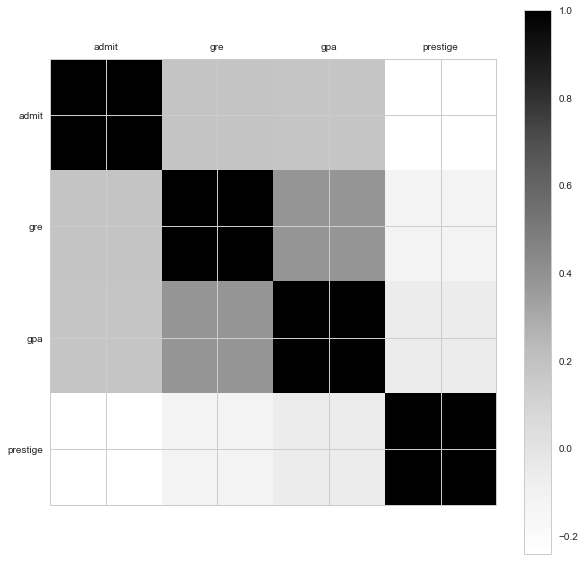

In [102]:
# visualizing the correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 55


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(admissions.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(admissions.corr().index)))
ax.set_yticks(range(len(admissions.corr().index)))
ax.set_xticklabels(admissions.corr().index)
ax.set_yticklabels(admissions.corr().index)

plt.show()



#### Question 12. What did you find?

Answer: GRE and GPA are the most correlated of the data points with being admitted.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

To examine the research question, a Spearman r correlation will be conducted to assess if a relationship exists between variable 1 (Admit) and variable 2 (Prestige). Positive coefficients indicate a direct relationship; as one variable increases, the other variable also increases. Negative correlations coefficients indicate an indirect relationship; as one variable increases, the other variable decreases.

In [197]:
stats.spearmanr(x)

SpearmanrResult(correlation=1.0, pvalue=0.0)

There is a positive correlation between admissions rates and prestige.

#### Question 14. What is your hypothesis?

H_0: There is no relationship between GPA, GRE, or Prestige when it comes to Admission.

Since P < 0.05 above, the null hypothesis will be rejected.